In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DayLocator, DateFormatter
from matplotlib.dates import date2num

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap

/home/r/Roshan.Jha/.local/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.21.0 or higher is recommended. You are running version 2.16.0
  warnings.warn(


In [9]:
data_path = ('../ERA5_T2/')
t2m_max =[]
for year in range(1973, 2023):
    print(year)
    file_path = os.path.join(data_path,f'T2_hourly-{year}-1deg.nc')
    t2m = xr.open_dataset(file_path)    
    temp_max = t2m.resample(time='D').max()
    t2m_max.append(temp_max)

1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [10]:
ds = xr.concat(t2m_max,dim='time')
lsm= xr.open_dataset('land_sea_mask.nc')
mask = lsm.lsm.values
ds = ds.where(mask != 0, float('nan'))

In [11]:
Tmax_RP = ds - 273.15
Tmax_RP = Tmax_RP.where(~((Tmax_RP['time.month'] == 2) & (Tmax_RP['time.day'] == 29)), drop=True)

In [13]:
tmax_subset = Tmax_RP
tmax_subset['dayofyear'] = tmax_subset['time.dayofyear']
leap_years = (tmax_subset['time.year'] % 4 == 0) & ((tmax_subset['time.year'] % 100 != 0) | (tmax_subset['time.year'] % 400 == 0))
tmax_subset['dayofyear'] = xr.where(leap_years & (tmax_subset['time.month'] > 2),
                                               tmax_subset['dayofyear'] - 1,
                                               tmax_subset['dayofyear'])

In [22]:
Tmax_RP_ds = tmax_subset.groupby('dayofyear') - tmax_subset.groupby('dayofyear').mean(dim='time')
tmax_grouped = tmax_subset.groupby('dayofyear')

In [ ]:
#Calculating 90th Percentile for each calendar day using 15 day moving window
Tmax_90P = []
for day in range(1, 366):
    # Calculate the indices for the rolling window
    window_indices = [(day + i) % 365 for i in range(-(15//2), 15//2+1)]
    window_indices = [idx if idx != 0 else idx+365 for idx in window_indices]
    
    # Concatenate groups for each calendar day with the rolling window
    selected_groups = [tmax_grouped[i] for i in window_indices]
    concatenated_data = xr.concat(selected_groups, dim='time')
    percentile_90p = np.percentile(concatenated_data.t2m, 90, axis=0)
    
    percentile_90p_dataarray = xr.DataArray(percentile_90p, coords={'latitude': tmax_subset.latitude, 'longitude': tmax_subset.longitude}, dims=['latitude', 'longitude'])
    Tmax_90P.append(percentile_90p_dataarray)  

In [50]:
Tmax_2022 = tmax_subset.t2m.sel(time=slice('2022-01-01','2022-12-31'),latitude=19,longitude=76)
Tmax_90Pctle = xr.concat(Tmax_90P, dim=Tmax_2022.time)

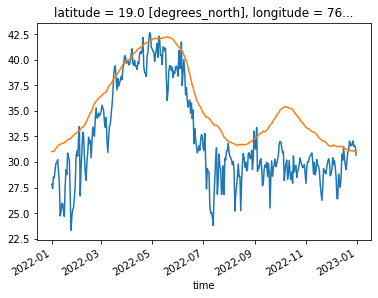

In [55]:
Tmax_2022.plot()
Tmax_90Pctle.sel(latitude=19,longitude=76).plot()

In [59]:
#Calculating 90th Percentile for each calendar day using 15 day moving window
tmax_grouped = Tmax_RP_ds.groupby('dayofyear')
Tmax_90P = []
for day in range(1, 366):
    # Calculate the indices for the rolling window
    window_indices = [(day + i) % 365 for i in range(-(15//2), 15//2+1)]
    window_indices = [idx if idx != 0 else idx+365 for idx in window_indices]
    
    # Concatenate groups for each calendar day with the rolling window
    selected_groups = [tmax_grouped[i] for i in window_indices]
    concatenated_data = xr.concat(selected_groups, dim='time')
    percentile_90p = np.percentile(concatenated_data.t2m, 90, axis=0)
    
    percentile_90p_dataarray = xr.DataArray(percentile_90p, coords={'latitude': tmax_subset.latitude, 'longitude': tmax_subset.longitude}, dims=['latitude', 'longitude'])
    Tmax_90P.append(percentile_90p_dataarray)  

In [ ]:
Tmax_2022_Ano = Tmax_RP_ds.t2m.sel(time=slice('2022-01-01','2022-12-31'),latitude=19,longitude=76)
Tmax_90Pctle_Ano = xr.concat(Tmax_90P, dim=Tmax_2022_Ano.time)

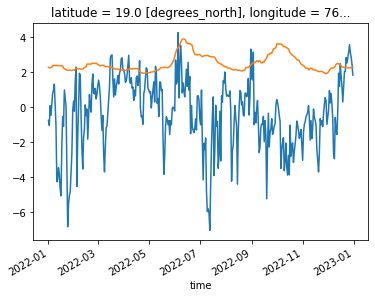

In [62]:
Tmax_2022_Ano.plot()
Tmax_90Pctle_Ano.sel(latitude=19,longitude=76).plot()

In [7]:
#data_path = ('../ERA5_T2/')
#t2m_max =[]
#for year in range(1973, 2023):
    #print(year)
    #file_path = os.path.join(data_path,f'T2_hourly-{year}-1deg.nc')
    #t2m = xr.open_dataset(file_path)    
    #temp_max = t2m.resample(time='D').max()
    #t2m_max.append(temp_max)

#ds1 = xr.concat(t2m_max,dim='time')
#ds1 = ds1.where(mask != 0, float('nan'))

In [70]:
Tmax = Tmax_RP_ds

In [71]:
Tmax

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, time: 18250)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 86.0 ... 3.0 2.0 1.0 0.0
  * time       (time) datetime64[ns] 1973-01-01 1973-01-02 ... 2022-12-31
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... nan nan nan

In [72]:
def heatwave_aspect(data):
    hot_days_only = data.where(data >0, drop=True).squeeze()
    if hot_days_only.size < 3:
        return 0, 0, 0, 0
    else:
        df_hd = hot_days_only.to_dataframe()
        df_hd['group'] = (df_hd.index.to_series().diff() != pd.Timedelta(days=1)).cumsum()
        grouped = df_hd.groupby('group')
        dataframes_list = [group.drop(columns='group') for _, group in grouped]
        dataframe_df_filtered = [df for df in dataframes_list if len(df) >= 3]
        hwf = sum(len(df) for df in dataframe_df_filtered)  # HWF: Total number of days in all dataframes
        hwn = len(dataframe_df_filtered)  # HWN: Number of dataframes in the list
        hwi = round(sum([df['hd'].cumsum().iloc[-1] for df in dataframe_df_filtered]), 2)
        if len(dataframe_df_filtered) == 0:
            hwd = 0
        else:
            hwd = max(len(df) for df in dataframe_df_filtered)  # HWD: Length of the dataframe with maximum values
        return hwf, hwd, hwn, hwi

In [73]:
lats= Tmax.sel(latitude=slice(60,0),longitude=slice(30,100)).latitude.values
lons= Tmax.sel(latitude=slice(60,0),longitude=slice(30,100)).longitude.values
years = np.arange(1973, 2023)

HWF = np.zeros([np.size(years),np.size(lats),np.size(lons)]) 
HWN = np.zeros([np.size(years),np.size(lats),np.size(lons)])
HWD = np.zeros([np.size(years),np.size(lats),np.size(lons)])
HWI = np.zeros([np.size(years),np.size(lats),np.size(lons)])

for yr, year in enumerate(range(1973, 2023)):
    print(year)
    Tmax_year = Tmax.sel(time=f'{year}',latitude=slice(60,0),longitude=slice(30,100))
    Tmax_90Pctle = xr.concat(Tmax_90P, dim=Tmax_year.time)
    Tmax_Pctle =  Tmax_90Pctle.sel(latitude=slice(60,0),longitude=slice(30,100))                 
    hot_days = xr.where(np.isnan(Tmax_year.t2m) | np.isnan(Tmax_Pctle),
                       np.nan,
                       (Tmax_year.t2m - Tmax_Pctle))
    hot_days.name='hd'
    hot_days_MAM = hot_days.sel(time=hot_days['time.season'] == 'MAM')
    
    for i,lat in enumerate(lats):
        for j,lon in enumerate(lons):
            data= hot_days_MAM[:,i,j]
            if (np.isnan(hot_days_MAM[0,i,j])):
                HWF[yr,i,j] = np.nan
                HWN[yr,i,j] = np.nan
                HWD[yr,i,j] = np.nan
                HWI[yr,i,j] = np.nan
            else:
                [hwf,hwd,hwn,hwi] = heatwave_aspect(data)
                HWF[yr,i,j] = hwf
                HWN[yr,i,j] = hwn
                HWD[yr,i,j] = hwd
                HWI[yr,i,j] = hwi          

1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [77]:
HW_Aspect = xr.Dataset({"HWF": (('year','latitude','longitude'), HWF),
                           "HWN": (('year','latitude','longitude'), HWN),
                           "HWD": (('year','latitude','longitude'), HWD),
                           "HWI": (('year','latitude','longitude'), HWI)},
                           coords={'year':years,'latitude': lats, 'longitude': lons})

HW_Aspect.to_netcdf('Heatwave_Aspect_New_Method_1973_2022.nc')  

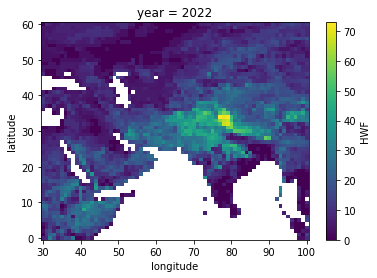

In [76]:
HW_Aspect.HWF[49,:,:].plot()

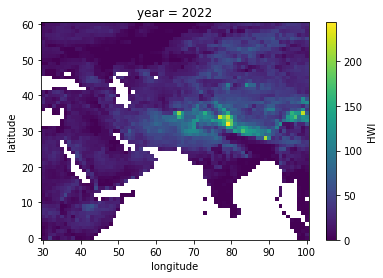

In [80]:
HW_Aspect.HWI[49,:,:].plot()

In [79]:
ds

<xarray.Dataset>
Dimensions:    (year: 50, latitude: 61, longitude: 71)
Coordinates:
  * year       (year) int64 1973 1974 1975 1976 1977 ... 2019 2020 2021 2022
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 56.0 ... 3.0 2.0 1.0 0.0
  * longitude  (longitude) float32 30.0 31.0 32.0 33.0 ... 97.0 98.0 99.0 100.0
Data variables:
    HWF        (year, latitude, longitude) float64 ...
    HWN        (year, latitude, longitude) float64 ...
    HWD        (year, latitude, longitude) float64 ...
    HWI        (year, latitude, longitude) float64 ...